In [1]:
#Import dependencies
#===================================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus as pydot
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [2]:
#Just so I can fully display all columns
#================================================
pd.options.display.max_columns=None

In [3]:
#Pull in my csv
#====================================
df = pd.read_csv("combined_ncaa_player_stats.csv")
df

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,/cbb/players/lou-zykiewicz-1.html,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,NaN,NaN,3.1,-4.16,NaN,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,NaN,1.7,7.0,-12.74,2.0,0
109658,/cbb/players/michal-zylinski-1.html,Michal Zylinski,1.5,0.333,0.5,0.0,NaN,0.0,2.0,6-4,0.5,1.5,-6.49,0.5,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,6-6,1.3,5.1,3.51,2.8,0


In [4]:
#convert height change nan to zero
df["height"]= df["height"].fillna('0-0')

In [5]:
#change height into inches 
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    df["height"] = df["height"].apply(parse_ht(ht))
print (df["height"].apply(lambda x:parse_ht(x)))

0         77.0
1         81.0
2         77.0
3         77.0
4         70.0
          ... 
109656     0.0
109657     0.0
109658    76.0
109659    78.0
109660    80.0
Name: height, Length: 109661, dtype: float64


In [6]:
df["height"] = df["height"].apply(lambda x:parse_ht(x))
df.head()

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [7]:
#replace NAN values with 0

df= df.fillna(0)

In [8]:
features = df.drop(columns=['is_pro','url','name'])

In [9]:
labels = ['Not Drafted', 'Drafted']

In [10]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,5))
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'cornflowerblue') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [11]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center', color = 'green')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

# Confusion Matrix Function Plot

In [12]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Decision Tree Classification

In [13]:
classy_tree = DecisionTreeClassifier(max_depth = 2)

In [14]:
# Feautures and Predicted
y = df['is_pro']

X  = features

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

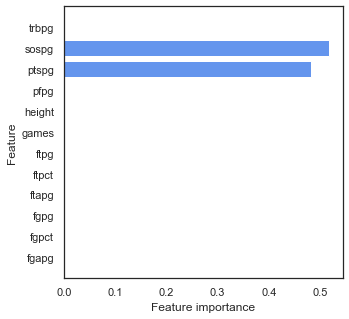

In [16]:
plot_feature_importances(classy_tree.fit(X_train, y_train))

In [17]:
classy_tree_cv_score = cross_val_score(classy_tree, X_train, y_train, cv=3)
mean_classy_tree_cv_score = np.mean(classy_tree_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_classy_tree_cv_score * 100))

Mean Cross Validation Score: 97.01%


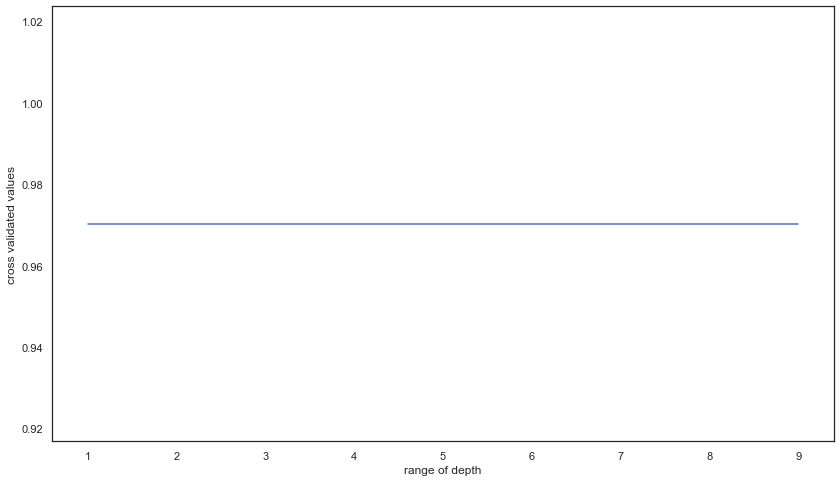

In [18]:
score = cross_val_score(classy_tree, X_train, y_train, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(classy_tree, X_train, y_train, cv = 10)
    val.append(depth_score.mean())
# print(val)
plt.figure(figsize = (14,8))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

# Model Testing

In [19]:
classy_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
#predictions = pd.DataFrame(test_preds,index=X_test.index,columns = y_test.unique())

In [20]:
# predict the response for new observations
test_preds = classy_tree.predict(X_test)

In [21]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.9717317416894636

In [22]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Accuracy Score: 0.9717317416894636
Precision Score: 0.5403225806451613
Recall Score: 0.31220876048462254
F1 Score: 0.3957471943295924

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35116
           1       0.54      0.31      0.40      1073

    accuracy                           0.97     36189
   macro avg       0.76      0.65      0.69     36189
weighted avg       0.97      0.97      0.97     36189



Predicted      0    1    All
True                        
0          34831  285  35116
1            738  335   1073
All        35569  620  36189


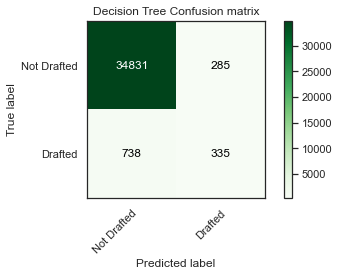

In [23]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Decision Tree Confusion matrix')

plt.show()


# Standard Scalar For Decision Tree

In [24]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [25]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

Accuracy Score: 0.9745226450026251
Precision Score: 0.6892230576441103
Recall Score: 0.25629077353215285
F1 Score: 0.37364130434782605

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35116
           1       0.69      0.26      0.37      1073

    accuracy                           0.97     36189
   macro avg       0.83      0.63      0.68     36189
weighted avg       0.97      0.97      0.97     36189



Predicted      0    1    All
True                        
0          34831  285  35116
1            738  335   1073
All        35569  620  36189


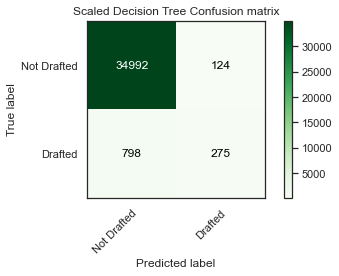

In [26]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Decision Tree Confusion matrix')

plt.show()

# Grid Search Decision Tree

In [27]:
dt_grid_param = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2, 3, 4, 5, 6],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(classy_tree, dt_grid_param, verbose=1, cv=3, n_jobs=-1)

dt_gs_results = dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [28]:
#Predict values based on new parameters
y_pred_acc = dt_grid_search.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(dt_grid_search.best_params_)
print("\nBest Estimator Found:")
print(dt_grid_search.best_estimator_)
print("Besti Score Found:")
print(dt_grid_search.best_score_)

Accuracy Score : 0.9740528889994197
Precision Score : 0.6163194444444444
Recall Score : 0.33084808946877914
F1 Score : 0.43056397816858705
Best Parameter Found:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}

Best Estimator Found:
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5)
Besti Score Found:
0.9726426432529719


# Decision Tree Grid Search Confusion Matrix

Predicted      0    1    All
True                        
0          34831  285  35116
1            738  335   1073
All        35569  620  36189


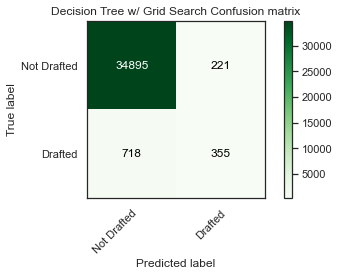

In [29]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Decision Tree w/ Grid Search Confusion matrix')

plt.show()


# Testing

In [30]:
test_pred_proba = classy_tree.predict_proba(X_test)

In [31]:
predictions = pd.DataFrame(test_pred_proba,index=X_test.index,columns = ['not_draft', 'drafted'])

In [32]:
success_failure = pd.merge(df, predictions, left_index=True, right_index=True, how='inner')

In [33]:
success_failure.index = success_failure.name

In [34]:
success_failure.drop(columns = ['name'], inplace= True )

In [35]:
success_failure.head(20)

,url,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro,not_draft,drafted
name,,,,,,,,,,,,,,,,
Steve Aaker,/cbb/players/steve-aaker-1.html,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0,0.993381,0.006619
Carlton Aaron,/cbb/players/carlton-aaron-1.html,7.3,0.542,3.9,3.8,0.486,1.9,93.0,81.0,2.8,9.8,0.32,6.9,0,0.993381,0.006619
Kris Aaron,/cbb/players/kris-aaron-1.html,0.5,0.500,0.3,0.0,0.000,0.0,4.0,77.0,0.8,0.5,8.86,1.3,0,0.915017,0.084983
Leslie Aaron,/cbb/players/leslie-aaron-1.html,1.2,0.400,0.5,1.1,0.655,0.7,26.0,0.0,0.7,1.7,-3.91,1.1,0,0.993381,0.006619
Michael Aaron,/cbb/players/michael-aaron-1.html,7.5,0.493,3.7,3.2,0.618,2.0,64.0,77.0,0.0,9.4,0.10,5.0,0,0.993381,0.006619
Troy Aaron,/cbb/players/troy-aaron-1.html,6.1,0.387,2.4,1.9,0.642,1.2,91.0,73.0,2.0,6.6,-2.67,2.6,0,0.993381,0.006619
Kwesi Abakah,/cbb/players/kwesi-abakah-1.html,0.8,0.422,0.3,0.6,0.429,0.3,109.0,80.0,1.1,0.9,0.75,1.3,0,0.993381,0.006619
Jerome Abbage,/cbb/players/jerome-abbage-1.html,5.1,0.363,1.9,0.7,0.722,0.5,54.0,78.0,0.9,5.5,-2.43,1.7,0,0.993381,0.006619
Ed Abbey,/cbb/players/ed-abbey-1.html,3.6,0.354,1.3,2.4,0.672,1.6,57.0,76.0,2.2,4.1,7.83,3.3,0,0.915017,0.084983


In [36]:
success_failure.to_csv("draft_prediction4.csv")